# GLOBAL SUPERSTORE ANALYSIS
The aim of this notebook is to guide the analysis project of the IT student and answer project questions

## DATA EXPLORATION

In [1]:
#import necessary python analysis modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
#import and check the top n rows of the dataset
df = pd.read_excel(r"C:\Users\olami\Documents\Datasets\GlobalSuperstore 2.xlsx")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/07/2012,31/07/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-05-02 00:00:00,2013-07-02 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
#convert columns to the appropriate data type
df.drop('Postal Code', axis = 1, inplace = True)


cols = ['Row ID']
datecol = ['Order Date', 'Ship Date']


for col in cols:
    df[col] = df[col].astype('object')


for col in datecol:
    df[col] = pd.to_datetime(df[col],dayfirst=True)

# DATA EXPLORATION

In [5]:
#How many total rows (orders/line items) are in the dataset?
print('There are a total of %s rows and %s columns in the dataset.'%(df.shape[0], df.shape[1]))

#What date range does this data cover (first Order Date to last Order Date)?
maximum = df['Order Date'].max()
minimum = df['Order Date'].min()
difference = (maximum.year - minimum.year)*12 + maximum.month - minimum.month

print('The least order date is %s the max order date is %s, spanning a total of %s months '%(minimum, maximum, difference))


#How many unique Orders are there? (Order ID)
print('There are a total of %s unique orders in the dataset '%(df['Order ID'].nunique()))

#How many unique Customers? (Customer ID)
print('There are a total of %s unique customers in the dataset '%(df['Customer ID'].nunique()))

#How many unique Products? (Product ID)
print('There are a total of %s unique products in the dataset '%(df['Product ID'].nunique()))

There are a total of 51290 rows and 23 columns in the dataset.
The least order date is 2011-01-01 00:00:00 the max order date is 2014-12-31 00:00:00, spanning a total of 47 months 
There are a total of 25035 unique orders in the dataset 
There are a total of 1590 unique customers in the dataset 
There are a total of 10292 unique products in the dataset 


In [6]:
#What are the different Ship Mode options available?
df['Ship Mode'].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

In [7]:
#What are the unique Segment types?
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
#List all the unique Category and Sub-Category combinations
df.groupby(['Category', 'Sub-Category'])['Row ID'].count()

Category         Sub-Category
Furniture        Bookcases       2411
                 Chairs          3434
                 Furnishings     3170
                 Tables           861
Office Supplies  Appliances      1755
                 Art             4883
                 Binders         6152
                 Envelopes       2435
                 Fasteners       2420
                 Labels          2606
                 Paper           3538
                 Storage         5059
                 Supplies        2425
Technology       Accessories     3075
                 Copiers         2223
                 Machines        1486
                 Phones          3357
Name: Row ID, dtype: int64

In [9]:
#What are the different Markets and Regions covered?
df.groupby(['Market', 'Region'])['Row ID'].count()

Market  Region        
APAC    Central Asia      2048
        North Asia        2338
        Oceania           3487
        Southeast Asia    3129
Africa  Africa            4587
Canada  Canada             384
EMEA    EMEA              5029
EU      Central           5822
        North             2141
        South             2037
LATAM   Caribbean         1690
        Central           2972
        North             2644
        South             2988
US      Central           2323
        East              2848
        South             1620
        West              3203
Name: Row ID, dtype: int64

# BASIC CALCULATION

In [10]:
#What is the total Sales revenue in the dataset?
sales = df['Sales'].sum().round(2)
print(f'The total sales revenue in the dataset is: {sales}$')

The total sales revenue in the dataset is: 12642501.91$


In [11]:
#What is the total profit?
profit = df['Profit'].sum().round(2)
print(f'The total profit is: {profit}$')

The total profit is: 1467457.29$


In [12]:
#What is the overall Profit Margin (Total Profit / Total Sales)?
print(f'The overall profit margin  is: {(profit/sales)*100:.2f}%')

The overall profit margin  is: 11.61%


In [25]:
#What is the average Discount percentage offered?
discount = df['Discount']
print(f'The average discount offered is {discount.mean():.2f}%') #to two decimal place

The average discount offered is 0.14%


In [22]:
#What is the total Quantity of items sold?
quantity = df['Quantity'].sum()
print(f'The total quantity of items sold is {quantity} ')

The total quantity of items sold is 178312 


In [26]:
#What is the average Shipping Cost?
shipping = df['Shipping Cost']
print(f'The average shipping cost is {shipping.mean():.2f}')

The average shipping cost is 26.38


<Axes: xlabel='Order ID'>

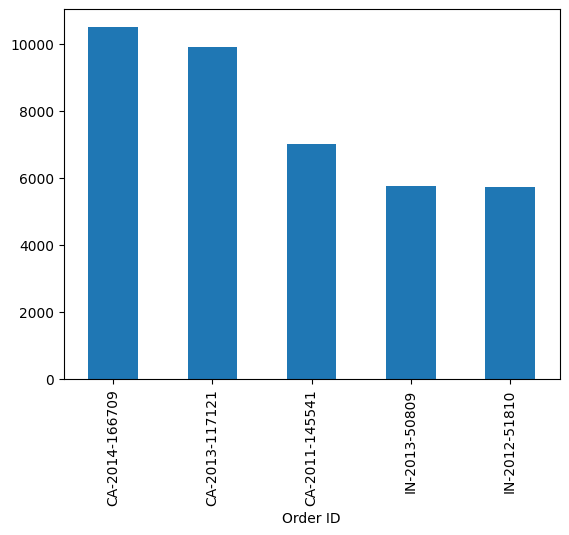

In [32]:
#What is the average Sales value per order? 
df.groupby('Order ID')['Sales'].mean().nlargest(5).plot(kind ='bar')